# NISQA MODEL PERFORMANCE ON TEST SET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300


NISQA-TTS (v1.0) results:
Pearson correlation coefficient: 0.35404013942515244
Mean absolute error: 1.0002379125478316
Mean squared error: 1.5156103062386415
Root mean squared error: 1.2311012575083502
R2 score: 0.07817030248945311



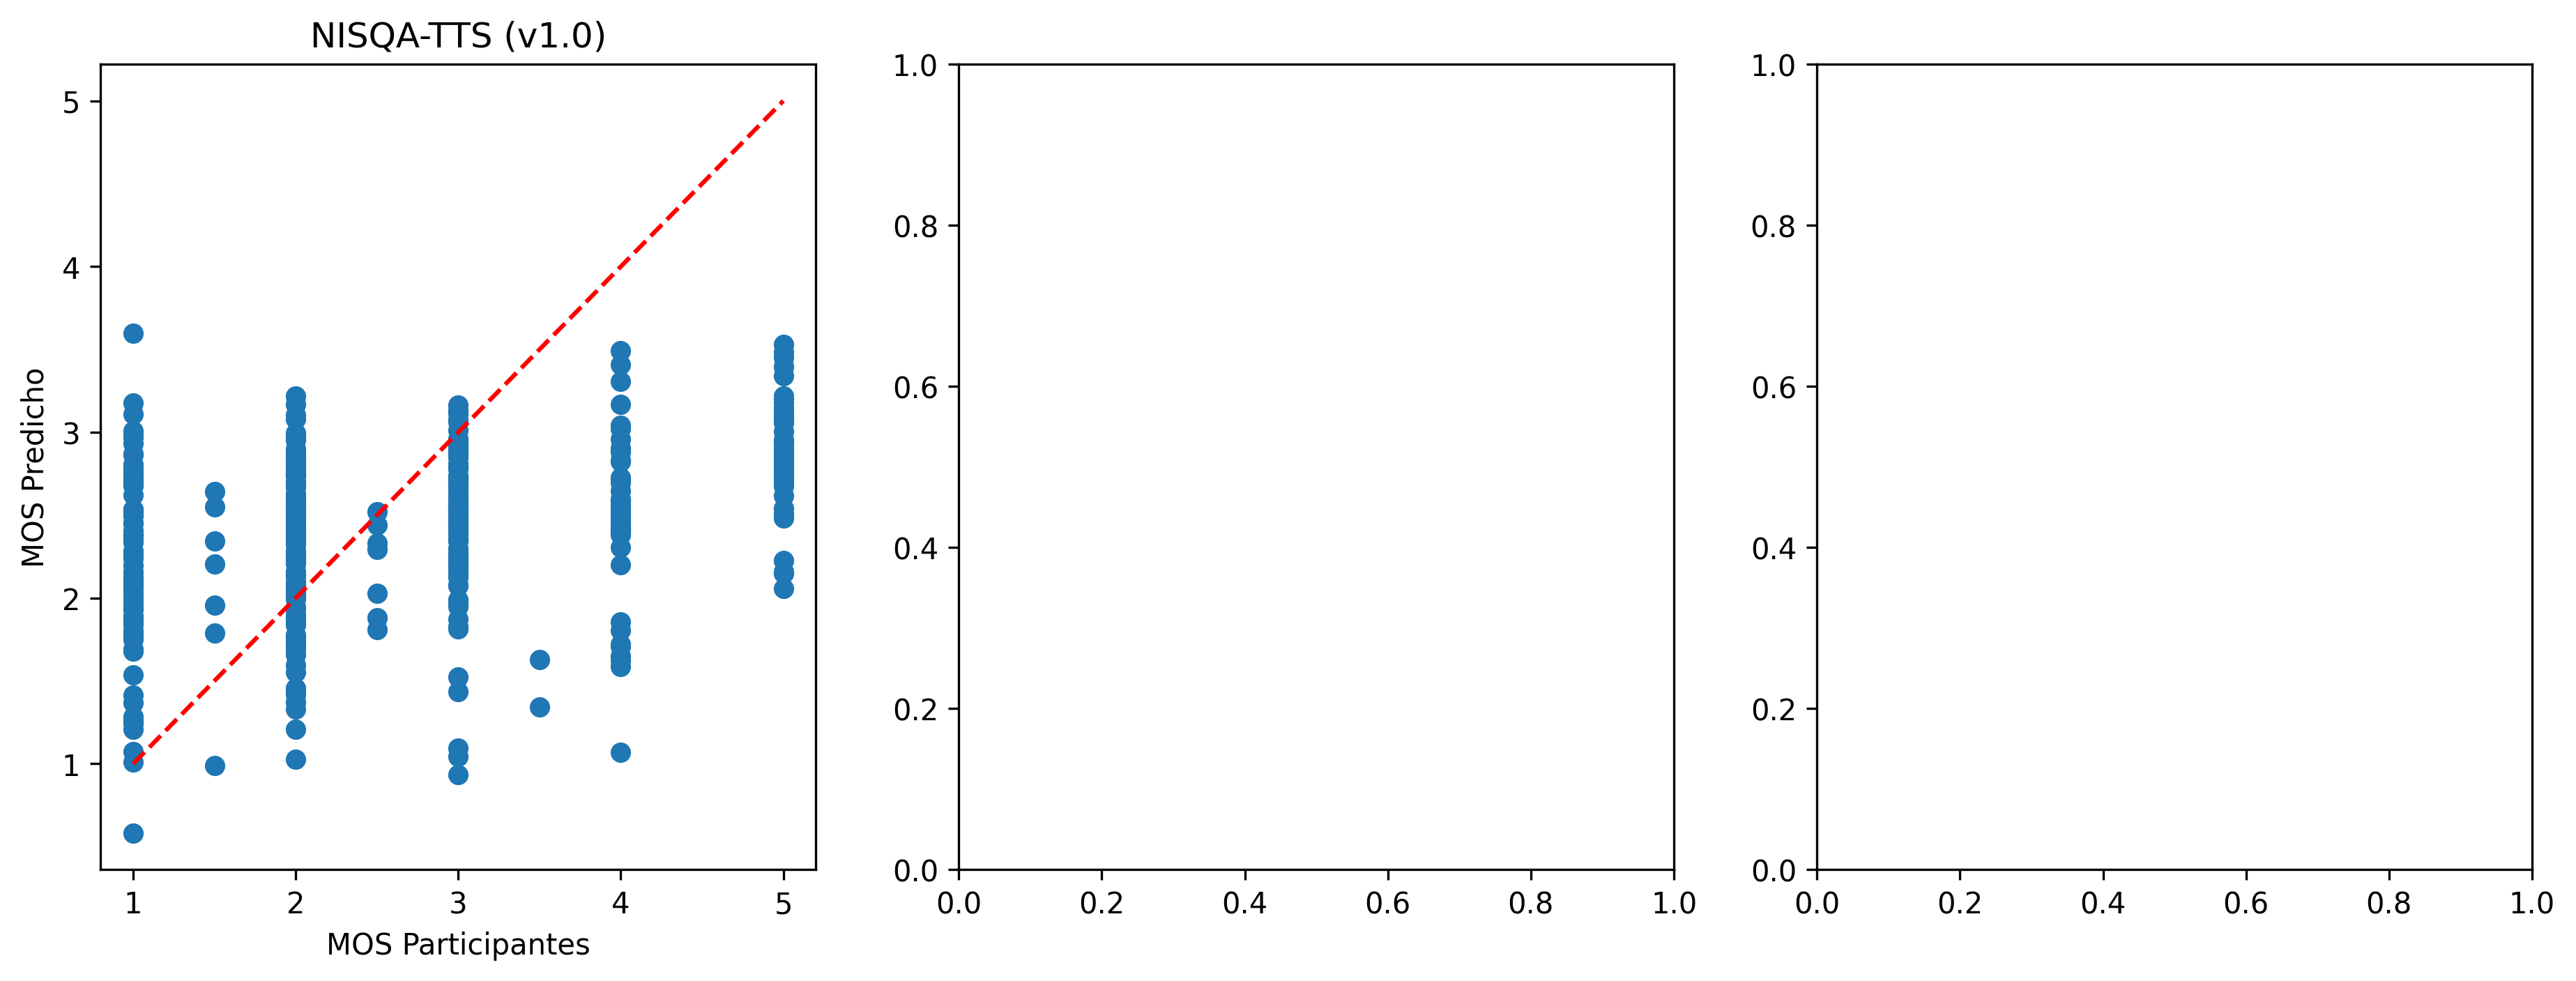

In [ ]:
# read test set, NISQA-TTS (v1.0) results, and NISQA (v2.0) results
test = pd.read_csv('test_shuffled_with_predictions.csv')




# calculate the Pearson correlation coefficient
UTMOS_corr = test['mos_pred'].corr(test['mos'])

# compute mae, mse, rmse and r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
mae_tts = mean_absolute_error(test['mos'], test['mos_pred'])
mse_tts = mean_squared_error(test['mos'], test['mos_pred'])
rmse_tts = root_mean_squared_error(test['mos'], test['mos_pred'])
r2_tts = r2_score(test['mos'], test['mos_pred'])

# print the results
print('NISQA-TTS (v1.0) results:')
print('Pearson correlation coefficient:', UTMOS_corr)
print('Mean absolute error:', mae_tts)
print('Mean squared error:', mse_tts)
print('Root mean squared error:', rmse_tts)
print('R2 score:', r2_tts)
print()


# plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(test['mos'], test['mos_pred'])
ax[0].set_title('UTMOSv2')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].plot([1, 5], [1, 5], 'r--')
plt.show()


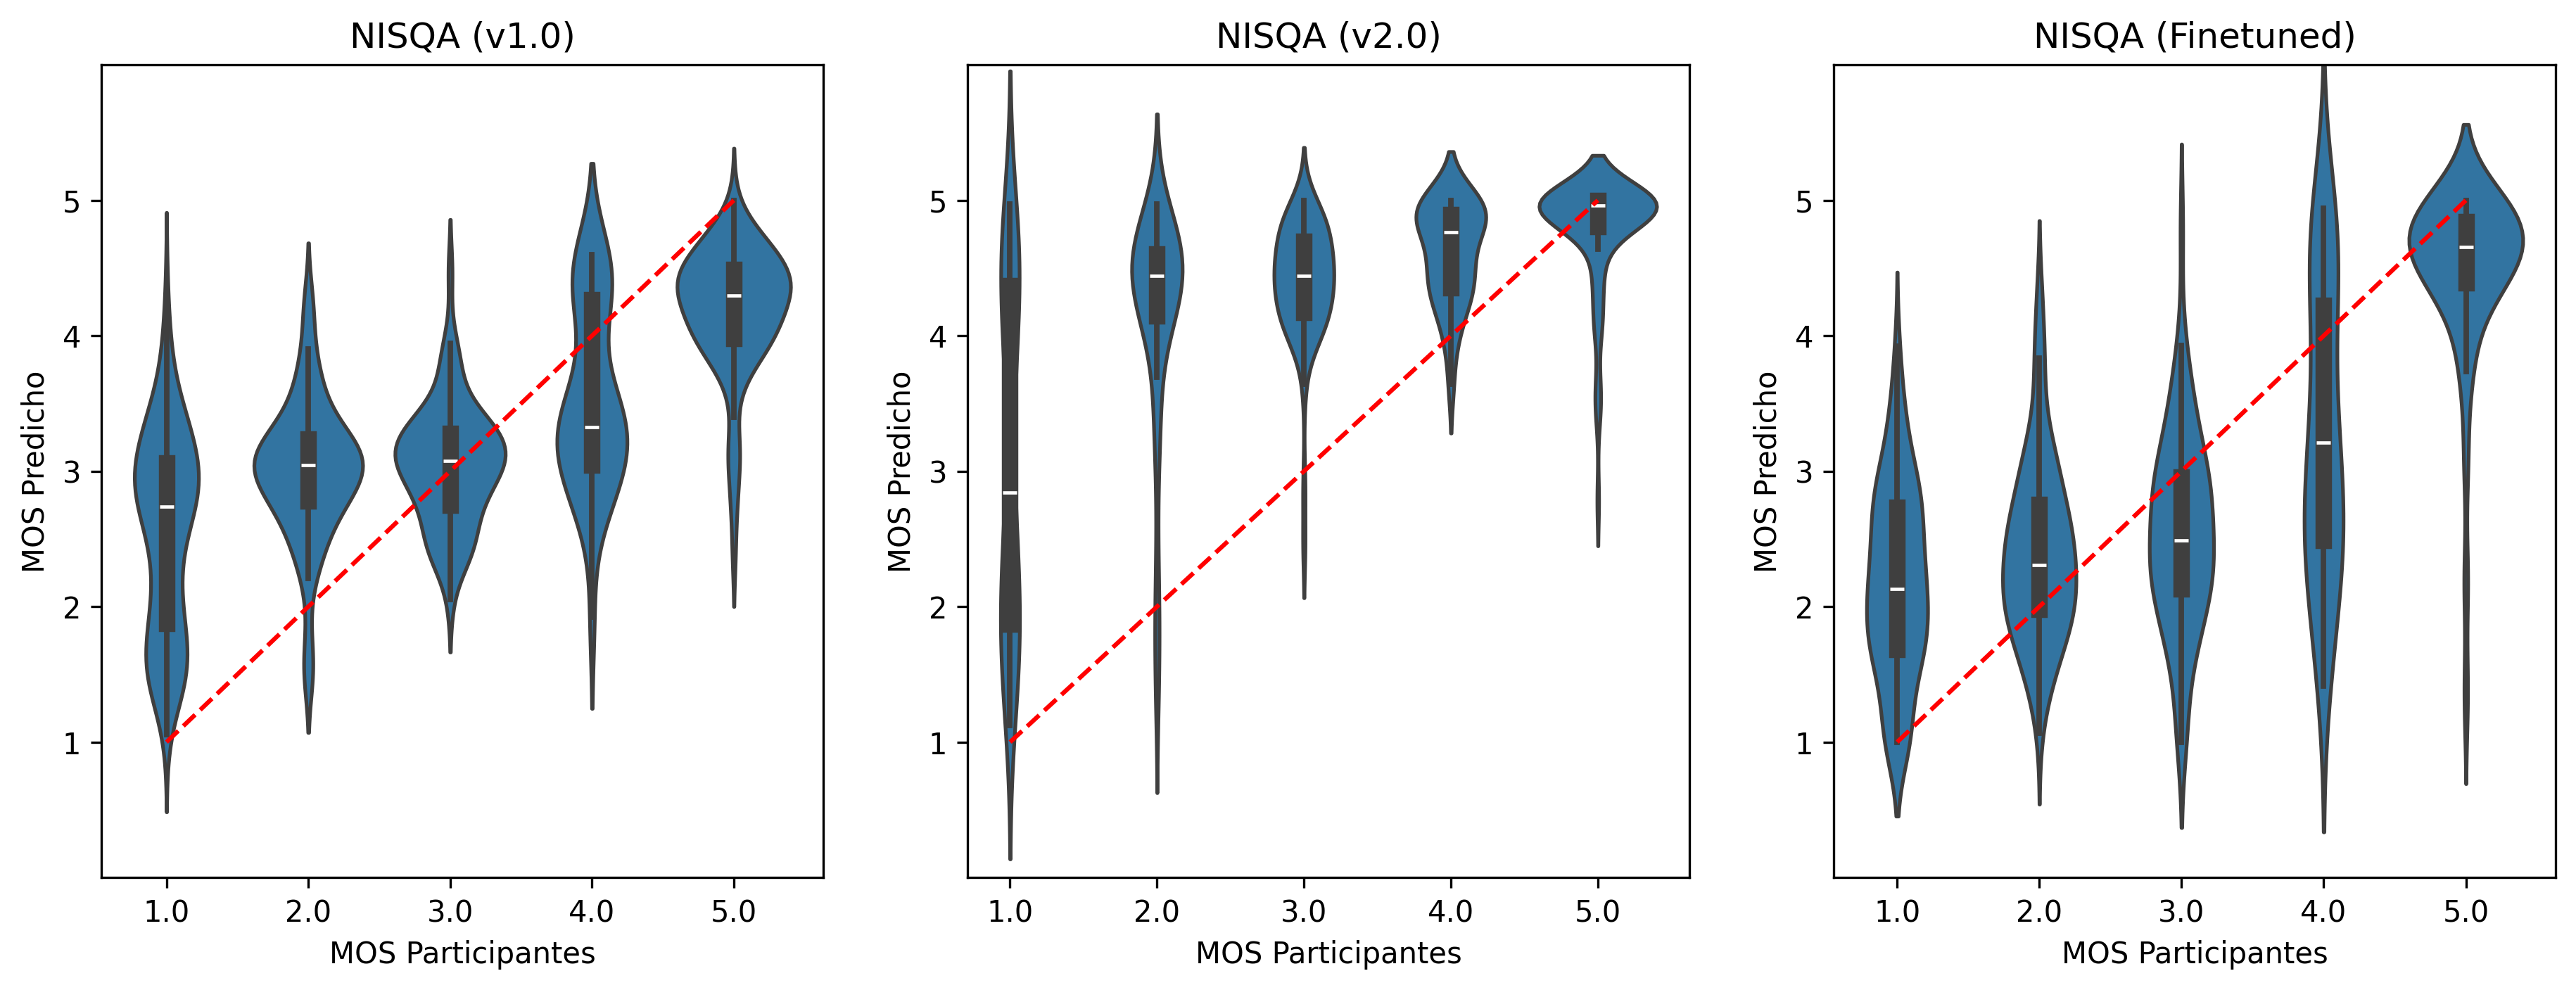

In [ ]:
# now, lets plot the same data but with seaborn using a violin plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(x='mos', y='mos_pred', data=test, ax=ax[0])
ax[0].set_title('NISQA (v1.0)')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].plot([0, 4], [1, 5], 'r--')
# y labels 1-5
ax[0].set_yticks([1, 2, 3, 4, 5])
ax[0].set_ylim(0, 6)
sns.violinplot(x='mos', y='mos_pred', data=NISQA_v2_paired, ax=ax[1])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].plot([0, 4], [1, 5], 'r--')
ax[1].set_yticks([1, 2, 3, 4, 5])
ax[1].set_ylim(0, 6)
sns.violinplot(x='mos', y='mos_pred', data=NISQA_finetuned_paired, ax=ax[2])
ax[2].set_title('NISQA (Finetuned)')
ax[2].set_xlabel('MOS Participantes')
ax[2].set_ylabel('MOS Predicho')
ax[2].plot([0, 4], [1, 5], 'r--')
ax[2].set_yticks([1, 2, 3, 4, 5])
ax[2].set_ylim(0, 6)
plt.show()


In [ ]:
# print the average MOS values for each model
print('NISQA-TTS (v1.0) average MOS:', test['mos'].mean())
print('NISQA (v2.0) average MOS:', NISQA_v2_paired['mos'].mean())
print('NISQA (Finetuned) average MOS:', NISQA_finetuned_paired['mos'].mean())

NISQA-TTS (v1.0) average MOS: 2.7205882352941178
NISQA (v2.0) average MOS: 2.7205882352941178
NISQA (Finetuned) average MOS: 2.7205882352941178


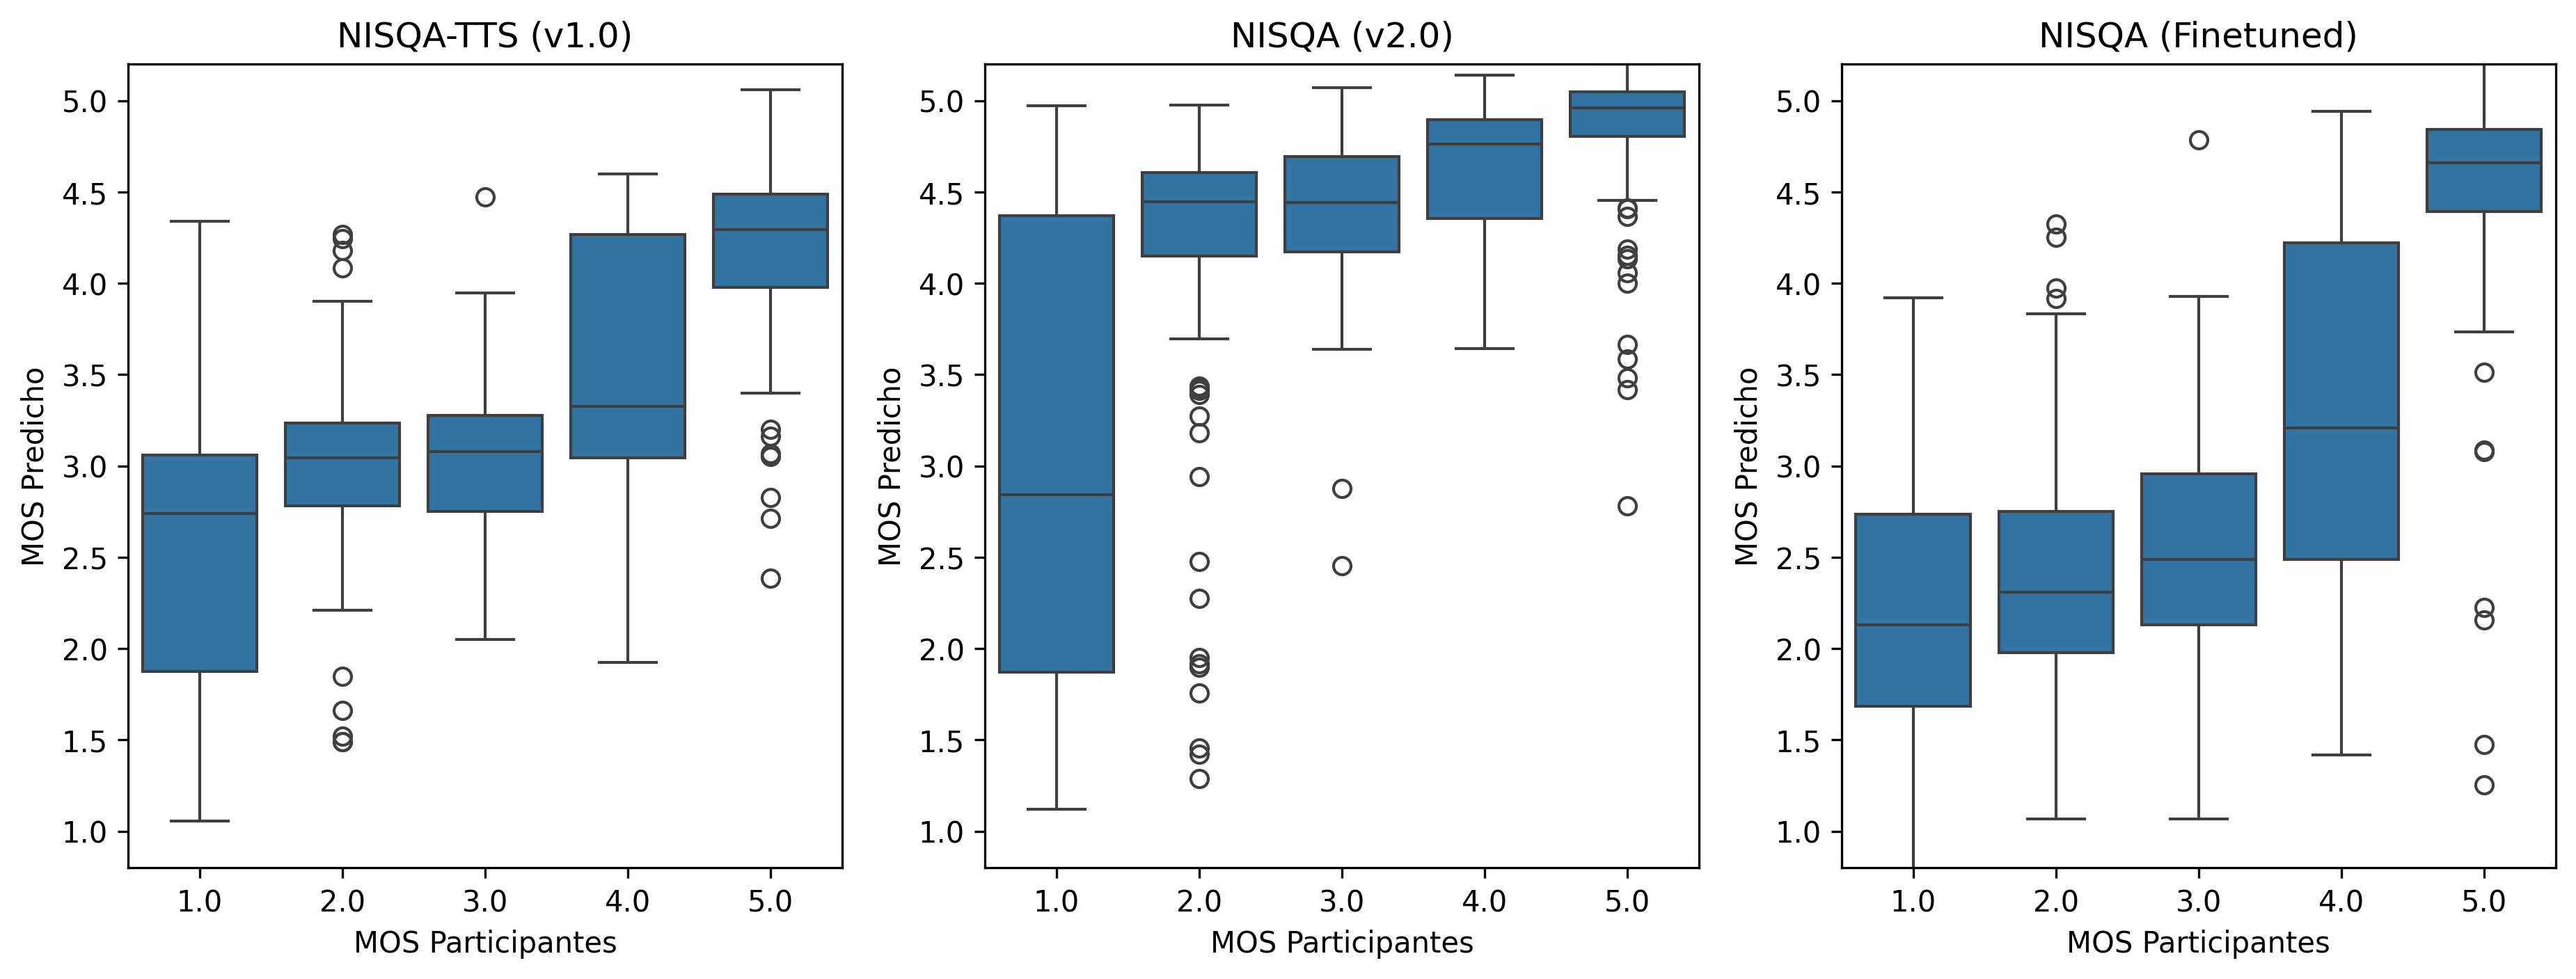

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='mos', y='mos_pred', data=test, ax=ax[0])
ax[0].set_title('NISQA-TTS (v1.0)')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].set_ylim(0.8, 5.2)
sns.boxplot(x='mos', y='mos_pred', data=NISQA_v2_paired, ax=ax[1])
ax[1].set_title('NISQA (v2.0)')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].set_ylim(0.8, 5.2)
sns.boxplot(x='mos', y='mos_pred', data=NISQA_finetuned_paired, ax=ax[2])
ax[2].set_title('NISQA (Finetuned)')
ax[2].set_xlabel('MOS Participantes')
ax[2].set_ylabel('MOS Predicho')
ax[2].set_ylim(0.8, 5.2)
plt.show()
